# Stochastic Gradient Descent (SGD)

Stochastic Gradient Descent (SGD) is a simple yet very efficient approach to fitting linear classifiers and regressors under convex loss functions such as (linear) Support Vector Machines and Logistic Regression. SGD can be used in large-scale and sparse machine learning problems often encountered in text classification and natural language processing. Given that the data is sparse, the classifiers in this module easily scale to problems with more than 10^5 training examples and more than 10^5 features.

SGD is merely an optimization technique and does not correspond to a specific family of machine learning models. It is only a way to train a model. Often, an instance of SGDClassifier or SGDRegressor will have an equivalent estimator in the scikit-learn API, potentially using a different optimization technique.

## Why SGD?

Nonconvex functions might have local minima or saddle points where the algorithm can get trapped. In such situations, your choice of learning rate or starting point can make the difference between finding a local minimum and finding the global minimum.

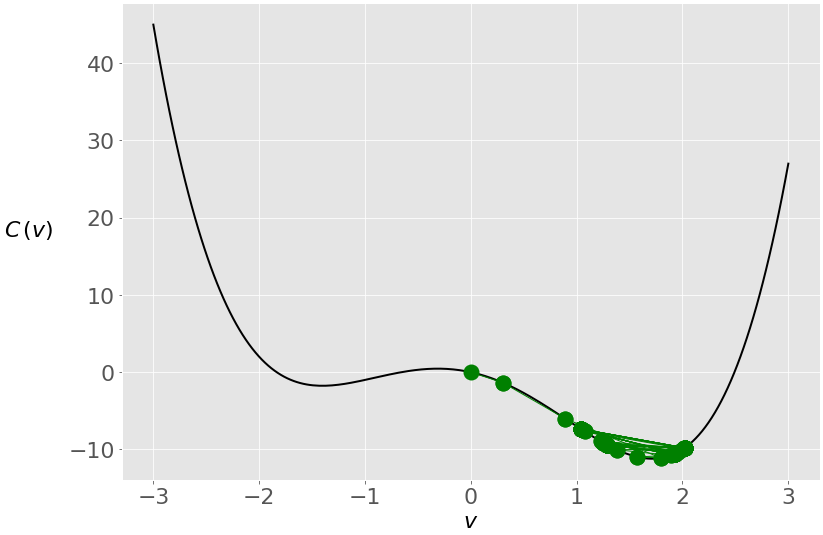

### The advantages of Stochastic Gradient Descent are:
* Efficiency.
* Ease of implementation (lots of opportunities for code tuning).

### The disadvantages of Stochastic Gradient Descent include:
* SGD requires a number of hyperparameters such as the regularization parameter and the number of iterations.
* SGD is sensitive to feature scaling.

## Stochastic Gradient Descent contourplot
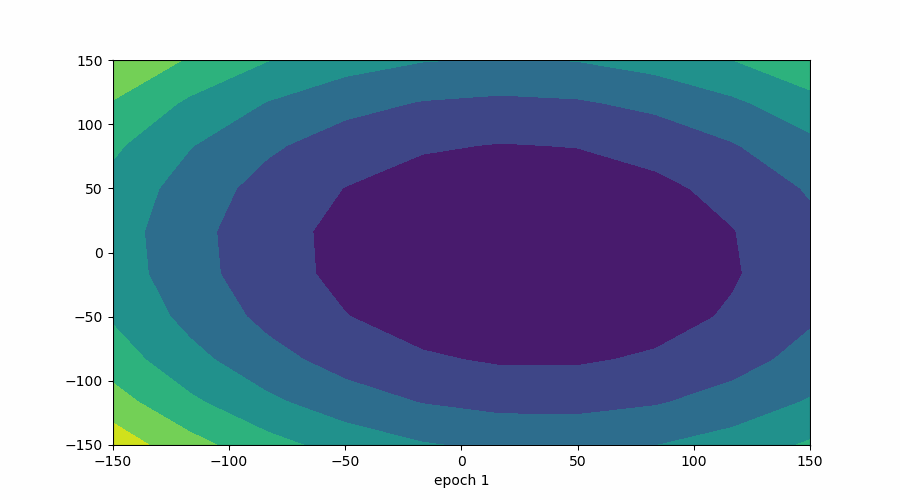

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
import time

In [7]:
X,y = load_diabetes(return_X_y=True)

In [8]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [10]:
reg = LinearRegression()
reg.fit(X_train,y_train)
print(reg.coef_)
print(reg.intercept_)

[  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]
151.88331005254167


In [11]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4399338661568969

## SGD Regressor from scratch

In [12]:
class SGDRegressor:
    
    def __init__(self,learning_rate=0.01,epochs=100):
        
        self.coef_ = None
        self.intercept_ = None
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X_train,y_train):
        # init your coefs
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])
        
        for i in range(self.epochs):
            for j in range(X_train.shape[0]):
                idx = np.random.randint(0,X_train.shape[0])
                
                y_hat = np.dot(X_train[idx],self.coef_) + self.intercept_
                
                intercept_der = -2 * (y_train[idx] - y_hat)
                self.intercept_ = self.intercept_ - (self.lr * intercept_der)
                
                coef_der = -2 * np.dot((y_train[idx] - y_hat),X_train[idx])
                self.coef_ = self.coef_ - (self.lr * coef_der)
        
        print(self.intercept_,self.coef_)
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [13]:
sgd = SGDRegressor(learning_rate=0.01,epochs=40)
start = time.time()
sgd.fit(X_train,y_train)
print("The time taken is",time.time() - start)

149.13225511705136 [  59.50999142  -48.97692218  317.02396111  229.88090081   24.76322001
  -12.73725038 -166.79623458  128.26558885  292.67814487  129.57234696]
The time taken is 1.3678584098815918


In [17]:
y_pred_sgd = sgd.predict(X_test)
r2_score(y_test,y_pred_sgd)

0.421230516676237

## Sklearn SGD Regressor

In [19]:
from sklearn.linear_model import SGDRegressor
reg = SGDRegressor(max_iter=100,learning_rate='constant',eta0=0.01)
reg.fit(X_train,y_train)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(learning_rate='constant', max_iter=100)

In [20]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.43288806307568517